In [82]:
%matplotlib inline
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

### Simple introduction:

- Generate k samples of size n from an exponential distribution
- Draw a histogram of a mean value of each sample
- Create histogram animation using n parameter (animation starts with n=0, increase in each frame)

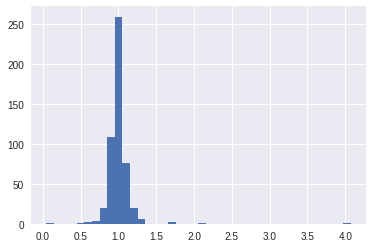

In [2]:
means = []
fig, ax = plt.subplots()

def animate(i, data):
    ax.clear()
    bins = plt.hist(data, bins=40)
    
    sample_mean = np.mean(np.random.exponential(size= i + 1))
    data.append(sample_mean)
    
    
anim = animation.FuncAnimation(fig, animate, frames=500, interval=80, fargs=(means,))
HTML(anim.to_html5_video())

### Bernoulli:

- generate n Bernoulli trials (with probability p)
- Count number of successes in each trial
- Visualize histogram of the number of successes
- Create histogram animation using n parameter (animation starts with n=0, increase in each frame)

https://stackoverflow.com/questions/36398445/numpy-draw-a-few-bernoulli-distributions-at-once

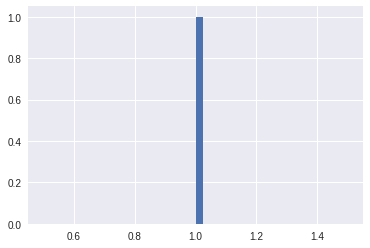

In [174]:
probability = 0.5
n = 1

fig, ax = plt.subplots()

def animate(i, probability):
    successes = np.random.binomial(n, p=probability, size= i + 1)
    ax.clear()
    bins = ax.hist(successes[successes > 0], bins=40)
    
    
anim = animation.FuncAnimation(fig, animate, frames=200, interval=80, fargs=(probability,))
HTML(anim.to_html5_video())

### Binomial

In [179]:
probability = 0.5
n = 100

fig, ax = plt.subplots()

def animate(i, probability):
    successes = np.random.binomial(n, p=probability, size= i + 1)
    ax.clear()
    bins = ax.hist(successes[successes > 0])
    
    
anim = animation.FuncAnimation(fig, animate, frames=200, interval=80, fargs=(probability,))
HTML(anim.to_html5_video())

### Multinomial

In [198]:
probabilities = [0.5, 0.3, 0.8]

fig, ax = plt.subplots()

def animate(i, probabilities):
    successes = np.random.multinomial(100, probabilities, i + 1)
    ax.clear()
    bins = ax.hist(successes.flatten(), bins=40)
    
    
anim = animation.FuncAnimation(fig, animate, frames=200, interval=80, fargs=(probabilities,))
HTML(anim.to_html5_video())

In [185]:
np.random.binomial(1, p, 100)

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1])

In [173]:
successes = np.random.binomial(1, 0.6, 10)
successes[successes > 0]

array([1, 1, 1, 1, 1, 1, 1])

### scatter plot of EACH attribute pair (matrix of plots), on diagonal we want to see histogram of given attribute

In [102]:
banks = pd.read_csv('datasets/bank.csv', sep=";")
banks_numeric = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
banks.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [103]:
sns.pairplot(banks[banks_numeric])

In [104]:
from scipy.io import arff

bankrupcy_arff = arff.loadarff('datasets/bankrupcy/1year.arff')
bankrupcy = pd.DataFrame(bankrupcy_arff[0])
bankrupcy_numeric_subset = 'Attr1 	Attr2 	Attr3 	Attr4 	Attr5'.split()

bankrupcy.head()

Attr1    Attr2    Attr3   Attr4    Attr5    Attr6     Attr7    Attr8  \
0  0.200550  0.37951  0.39641  2.0472  32.3510  0.38825  0.249760  1.33050   
1  0.209120  0.49988  0.47225  1.9447  14.7860  0.00000  0.258340  0.99601   
2  0.248660  0.69592  0.26713  1.5548  -1.1523  0.00000  0.309060  0.43695   
3  0.081483  0.30734  0.45879  2.4928  51.9520  0.14988  0.092704  1.86610   
4  0.187320  0.61323  0.22960  1.4063  -7.3128  0.18732  0.187320  0.63070   

    Attr9   Attr10  ...      Attr56   Attr57   Attr58    Attr59  Attr60  \
0  1.1389  0.50494  ...    0.121960  0.39718  0.87804  0.001924  8.4160   
1  1.6996  0.49788  ...    0.121300  0.42002  0.85300  0.000000  4.1486   
2  1.3090  0.30408  ...    0.241140  0.81774  0.76599  0.694840  4.9909   
3  1.0571  0.57353  ...    0.054015  0.14207  0.94598  0.000000  4.5746   
4  1.1559  0.38677  ...    0.134850  0.48431  0.86515  0.124440  6.3985   

   Attr61   Attr62  Attr63   Attr64  class  
0  5.1372   82.658  4.4158   7.4277   b'0'  
1  3.2732  107.350  3.4000  60.9870   b'0'  
2  3.9510  134.270  2.7185   5.2078   b'0'  
3  3.6147   86.435  4.2228   5.5497   b'0'  
4  4.3158  127.210  2.8692   7.8980   b'0'  

[5 rows x 65 columns]

In [105]:
sns.pairplot(bankrupcy[['Attr1', 'Attr2', 'Attr3', 'Attr6', 'Attr10']][:1000])


In [106]:
glass = pd.read_csv('datasets/glass.data')
glass.head()


id       ri     na    mg    al     si     k    ca   ba   fe  class
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0      1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0      1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0      1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0      1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0      1

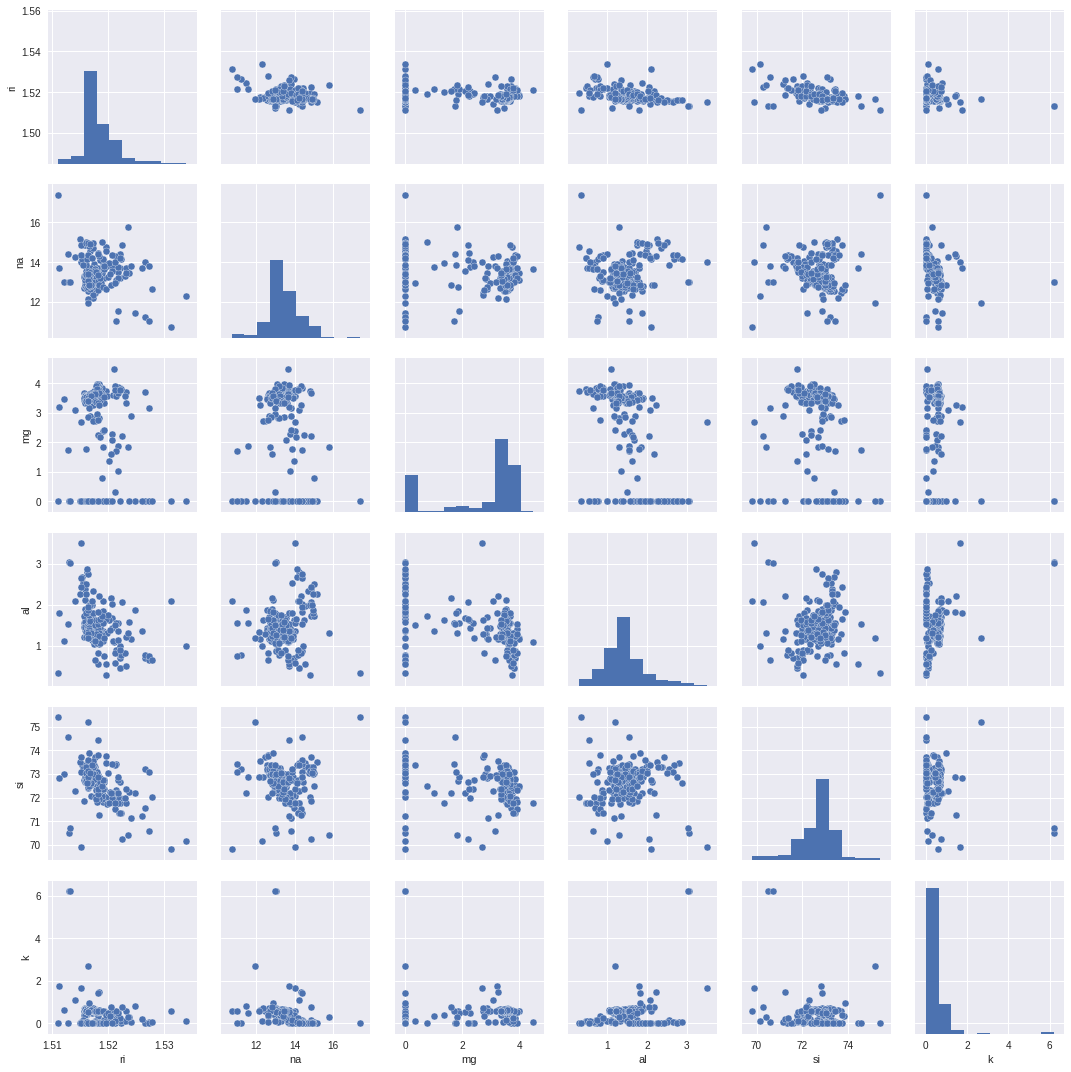

In [107]:
glass_feature = 'ri 	na 	mg 	al 	si 	k'.split()
sns.pairplot(glass[glass_feature])

### scatter plot of each attribute pair with histograms on axes (write a function that generates plot for given attributes pair) 

In [116]:
def plot_scatter_plots_with_hists(attrs, data):
    for x_name, y_name in itertools.permutations(attrs, 2):
        sns.jointplot(x=x_name, y=y_name, data=data)

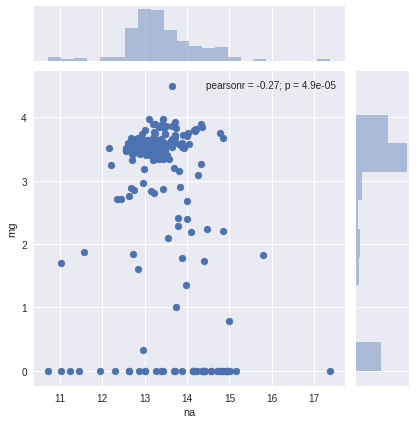

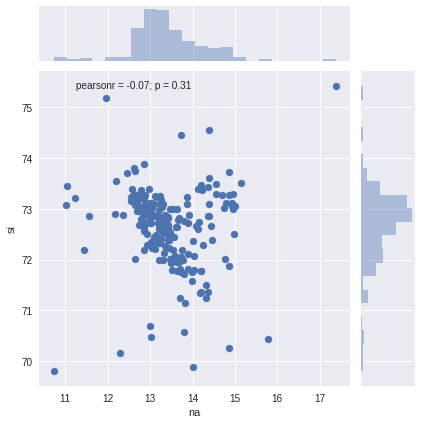

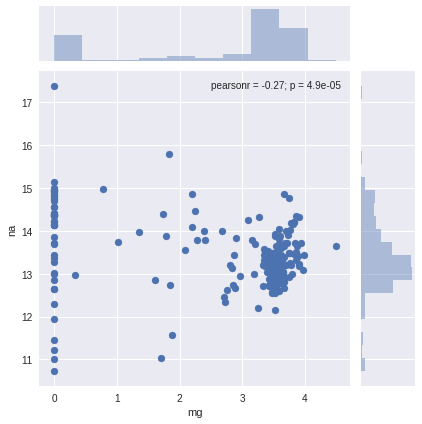

In [117]:
plot_scatter_plots_with_hists(['na', 'mg', 'si'], glass)

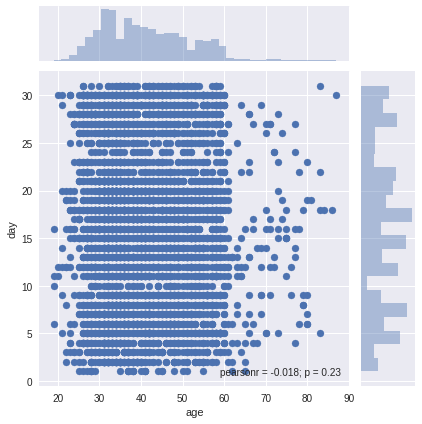

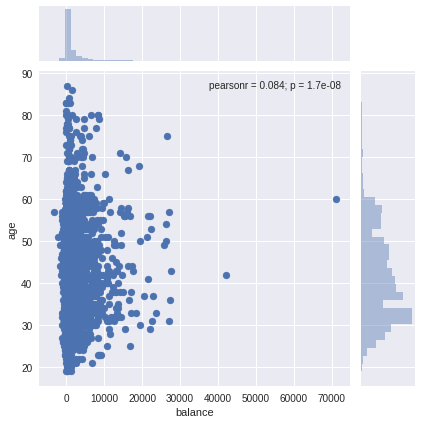

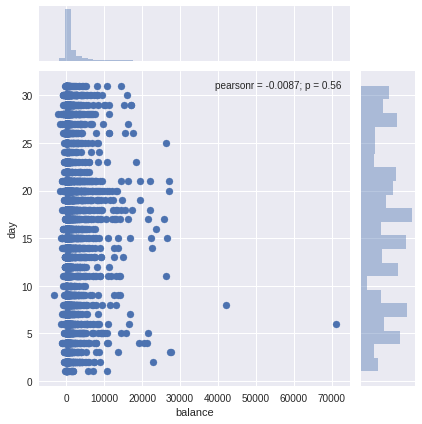

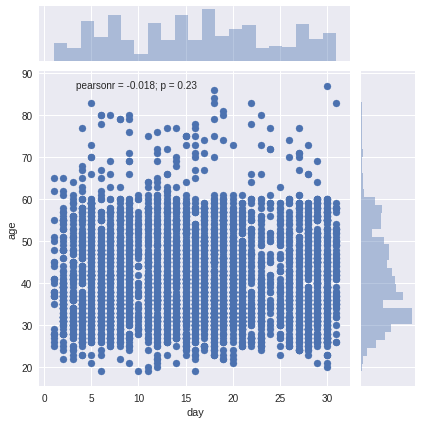

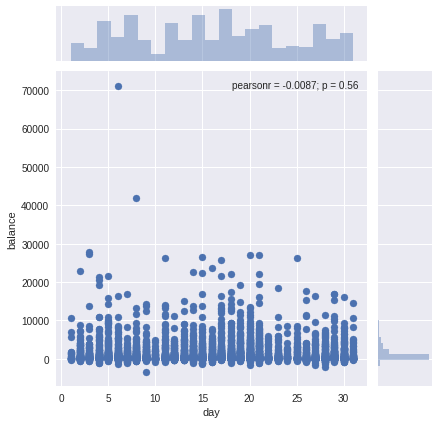

In [120]:
plot_scatter_plots_with_hists(banks_numeric[:3], banks)

### correlation (for EACH attribute pair, if appropriate)

In [139]:
def plot_corr_or_cov_for_dataset(data, features, metric_type):
    matrix = getattr(data[features], metric_type)()
    plt.figure(figsize=(8,8))
    
    sns.heatmap(matrix, cbar=True,
            square=True,
            annot=True,
            fmt='.2f',
            annot_kws={'size': 10},
            xticklabels=features,
            yticklabels=features,
            cmap='coolwarm')

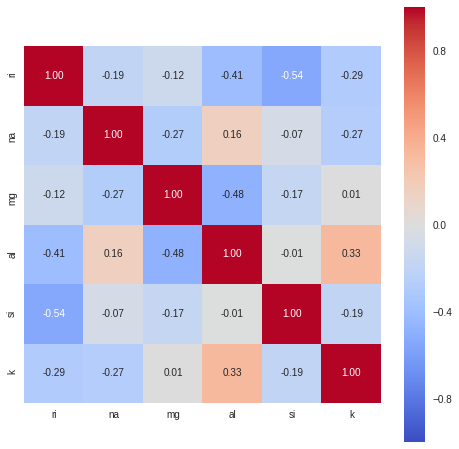

In [140]:
plot_corr_or_cov_for_dataset(glass, glass_feature, 'corr')

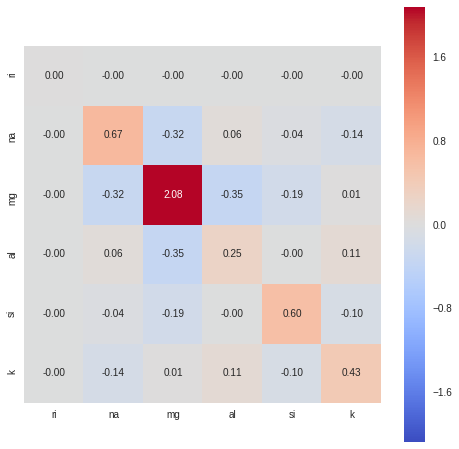

In [141]:
plot_corr_or_cov_for_dataset(glass, glass_feature, 'cov')

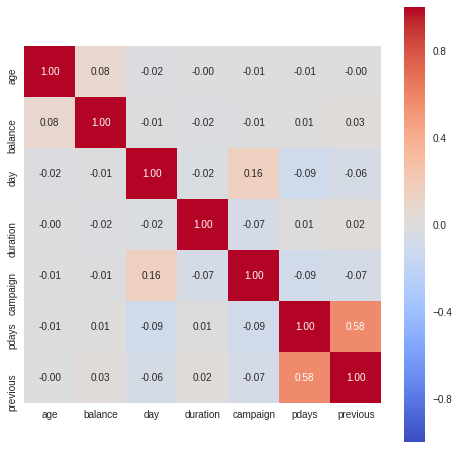

In [143]:
plot_corr_or_cov_for_dataset(banks, banks_numeric, 'corr')


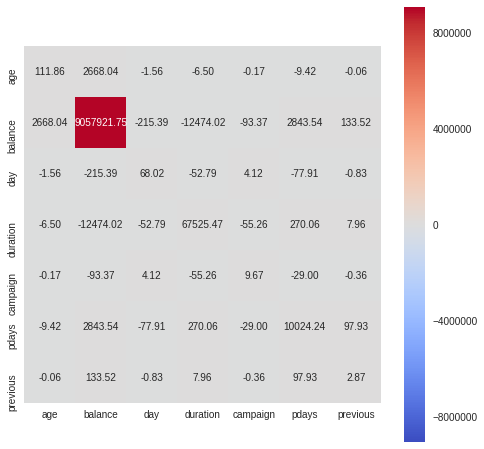

In [142]:
plot_corr_or_cov_for_dataset(banks, banks_numeric, 'cov')
